# Hackathon Engie #power # data - Projet PERLE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

### Engie B2T: consommation électrique des batiments

In [7]:
conso_b2t_df = pd.read_csv('b2t/consommation_electricite.csv', sep=',')

In [8]:
conso_b2t_df.head()

,Site Name,Meter ID,Type,Date,00:00,00:30,01:00,01:30,02:00,02:30,...,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30
0,Aquatics Centre,10A20216,KWH,2015-01-01,95.4,98.4,98.0,98.0,97.8,98.2,...,96.4,97.4,96.6,96.0,95.8,95.8,96.2,96.2,95.6,96.0
1,Aquatics Centre,10A20216,KWH,2015-01-02,100.6,97.4,97.6,97.8,97.6,97.8,...,101.6,101.8,103.2,98.8,75.0,74.2,83.8,100.4,100.2,98.8
2,Aquatics Centre,10A20216,KWH,2015-01-03,90.8,101.2,101.2,101.6,98.4,100.4,...,95.8,96.2,95.8,95.6,95.0,94.4,94.6,95.0,95.0,94.0
3,Aquatics Centre,10A20216,KWH,2015-01-04,89.0,92.2,92.6,92.8,94.4,93.4,...,110.8,109.8,110.0,112.6,109.2,109.4,109.6,107.0,93.8,92.2
4,Aquatics Centre,10A20216,KWH,2015-01-05,92.8,91.4,90.2,90.8,92.6,91.8,...,111.0,112.2,110.6,111.4,112.0,111.2,98.4,95.0,95.2,94.6


### Engie Cofely: consommation des batiments en gaz naturel et Eau chaude sanitaire

In [9]:
conso_chauffage_df = pd.read_csv('Cofely/donnees_chauffage_batiment.csv', sep=',')

In [11]:
conso_chauffage_df.head()

,Date_heure,id_installation,BASE_VN_T.EXTER_T.REF_CORRIGE,CIR1_VN_AMB_T.AMB_CORRIGE,CIR2_VN_AMB_T.AMB_CORRIGE,CIR3_VN_AMB_T.AMB_CORRIGE,CIR1_AI_EAU_T.DEP_SONDE,CIR2_AI_EAU_T.DEP_SONDE,CIR3_AI_EAU_T.DEP_SONDE,CIR1_AI_EAU_T.RET_SONDE,CIR2_AI_EAU_T.RET_SONDE,CIR3_AI_EAU_T.RET_SONDE,ECS_AI_EAU_T.DEP_SONDE,ECS_AI_EAU_T.RET_SONDE,ECS_AI_PRIM_T.DEP_SONDE,PRIM_AI_EAU_T.DEP_SONDE,PRIM_AI_EAU_T.RET_SONDE,CPT_RN_GAZ_INDEX,CPT_RN_ECS_INDEX
0,2015-10-10 00:00:00,2341757001,15.30,18.8,20.90,20.2,32.58,35.53,29.83,47.45,42.78,22.54,56.31,53.88,55.70,69.04,68.79,23492.8,467.7
1,2015-10-10 01:00:00,2341757001,14.10,18.8,20.70,20.0,32.10,35.21,31.19,46.99,42.80,22.41,55.94,53.68,55.38,71.67,73.13,23492.8,467.7
2,2015-10-10 02:00:00,2341757001,14.12,18.8,20.50,19.9,31.78,34.89,30.32,47.10,43.08,22.21,55.80,53.75,55.17,69.92,71.40,23492.8,467.7
3,2015-10-10 03:00:00,2341757001,12.05,18.8,20.25,19.8,31.78,35.04,30.65,46.48,42.30,22.09,56.18,53.83,55.59,68.62,70.46,23492.8,467.7
4,2015-10-10 04:00:00,2341757001,13.71,18.8,20.10,19.7,31.59,34.87,30.21,46.35,42.31,22.06,55.96,53.93,55.42,67.45,68.84,23492.8,467.7


### Engie Renouvelables: production d'electricité (fermes solaires et fermes éoliennes)

In [175]:
production_wind_df = pd.read_csv('FranceRenouvelable/donnees_eoliennes.csv', sep=',')
production_solar_df = pd.read_csv('FranceRenouvelable/donnees_production_panneaux_solaires.csv', sep=',')

In [176]:
production_wind_df['datetime'] = pd.to_datetime(production_wind_df['date_heure'], format='%Y-%m-%d %H:%M:%S')
production_wind_df.set_index('datetime', inplace=True)

In [177]:
production_wind_df.head()

,date_heure,id_eolienne,parc,vitesse vent (m/s),direction vent,puissance active (kW),angle nacelle,vitesse de rotation du rotor (rpm),temperature exterieure (C),temperature interieure (C),region
datetime,,,,,,,,,,,
2015-06-01 00:00:00,2015-06-01 00:00:00,Parc1-E01,Parc1,9.08,188.66,1675.45,186.54,13.55,11.21,64.87,Est
2015-06-01 00:10:00,2015-06-01 00:10:00,Parc1-E01,Parc1,8.61,186.47,1421.92,185.90,12.60,11.18,62.96,Est
2015-06-01 00:20:00,2015-06-01 00:20:00,Parc1-E01,Parc1,8.38,184.37,1338.56,183.51,11.20,11.05,63.93,Est
2015-06-01 00:30:00,2015-06-01 00:30:00,Parc1-E01,Parc1,10.27,235.62,2111.74,224.34,11.04,10.92,65.58,Est
2015-06-01 00:40:00,2015-06-01 00:40:00,Parc1-E01,Parc1,9.13,263.42,1551.53,259.00,10.67,10.90,66.24,Est


In [178]:
production_wind_df['puissance active (MWh)'] = production_wind_df['puissance active (kW)'] / 10**6

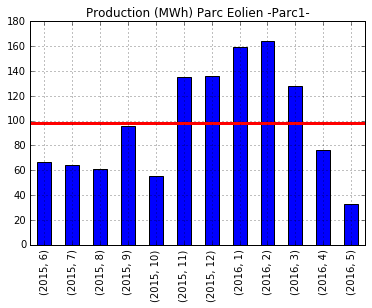

In [195]:
parc_df = production_wind_df[ production_wind_df['parc'] == 'Parc1' ]
df = pd.groupby(parc_df, by=[parc_df.index.year, parc_df.index.month]).sum()
df['puissance active (MWh)'].plot(title='Production (MWh) Parc Eolien -Parc1-', grid=True, kind='bar')
plt.axhline(y=df['puissance active (MWh)'].mean(), linewidth=3, color = 'r')
plt.show()

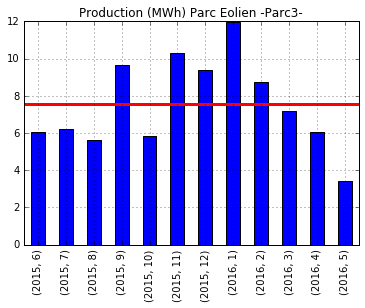

In [185]:
parc_df = production_wind_df[ production_wind_df['parc'] == 'Parc3' ]
df = pd.groupby(parc_df, by=[parc_df.index.year, parc_df.index.month]).sum()
df['puissance active (MWh)'].plot(title='Production (MWh) Parc Eolien -Parc3-', grid=True, kind='bar')
plt.axhline(y=df['puissance active (MWh)'].mean(), linewidth=3, color = 'r')
plt.show()

In [163]:
production_solar_df.head()

,Date_heure,Puissance_active_onduleur1(kW),Puissance_active_onduleur2(kW),Puissance_active_onduleur3(kW),Puissance_active_onduleur4(kW),Puissance_active_onduleur5(kW)
0,2016-06-15 11:00:00,254.74,273.46,193.34,231.89,162.48
1,2016-06-15 10:50:00,265.05,291.36,256.87,253.49,217.68
2,2016-06-15 10:40:00,220.58,242.40,230.44,254.55,226.38
3,2016-06-15 10:30:00,154.03,148.81,180.79,167.84,187.77
4,2016-06-15 10:20:00,142.39,150.59,163.73,204.79,143.41


In [164]:
production_solar_df['datetime'] = pd.to_datetime(production_solar_df['Date_heure'], format='%Y-%m-%d %H:%M:%S')
production_solar_df.set_index('datetime', inplace=True)

In [165]:
production_solar_df.head()

,Date_heure,Puissance_active_onduleur1(kW),Puissance_active_onduleur2(kW),Puissance_active_onduleur3(kW),Puissance_active_onduleur4(kW),Puissance_active_onduleur5(kW)
datetime,,,,,,
2016-06-15 11:00:00,2016-06-15 11:00:00,254.74,273.46,193.34,231.89,162.48
2016-06-15 10:50:00,2016-06-15 10:50:00,265.05,291.36,256.87,253.49,217.68
2016-06-15 10:40:00,2016-06-15 10:40:00,220.58,242.40,230.44,254.55,226.38
2016-06-15 10:30:00,2016-06-15 10:30:00,154.03,148.81,180.79,167.84,187.77
2016-06-15 10:20:00,2016-06-15 10:20:00,142.39,150.59,163.73,204.79,143.41


In [166]:
production_solar_df['Date_heure'] = 0
production_solar_df['production_kw'] = production_solar_df.sum(axis=1)

In [169]:
production_solar_df['production_kw'].head()

datetime
2016-06-15 11:00:00    1115.91
2016-06-15 10:50:00    1284.45
2016-06-15 10:40:00    1174.35
2016-06-15 10:30:00     839.24
2016-06-15 10:20:00     804.91
Name: production_kw, dtype: float64

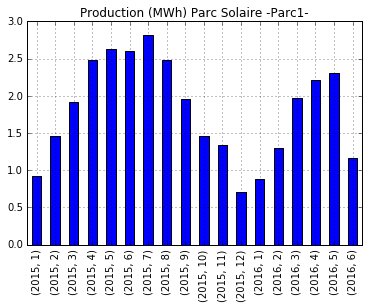

In [171]:
parc_df = production_solar_df['production_kw']
df = pd.groupby(parc_df, by=[parc_df.index.year, parc_df.index.month]).sum() / 10**6
df.plot(title='Production (MWh) Parc Solaire -Parc1-', grid=True, kind='bar')

In [167]:
production_solar_df.head()

,Date_heure,Puissance_active_onduleur1(kW),Puissance_active_onduleur2(kW),Puissance_active_onduleur3(kW),Puissance_active_onduleur4(kW),Puissance_active_onduleur5(kW),production_kw
datetime,,,,,,,
2016-06-15 11:00:00,0,254.74,273.46,193.34,231.89,162.48,1115.91
2016-06-15 10:50:00,0,265.05,291.36,256.87,253.49,217.68,1284.45
2016-06-15 10:40:00,0,220.58,242.40,230.44,254.55,226.38,1174.35
2016-06-15 10:30:00,0,154.03,148.81,180.79,167.84,187.77,839.24
2016-06-15 10:20:00,0,142.39,150.59,163.73,204.79,143.41,804.91


### Engie Reseaux: consommation des batiments en réseau de chaleur

In [351]:
conso_reseaux_df = pd.read_csv('FranceReseaux/Consommation_estimee_batiments.csv', sep=',')

In [6]:
conso_reseaux_df.head()

,BATIMENT_ID,IRIS,Hauteur_moyenne,Annee_construction,Surface_totale,Surface_residentiel,Surface_tertiaire,Besoin_total,Besoin_residentiel,Besoin_tertiaire,Proba_elec_ind,Proba_gaz_ind,Proba_reseau_chaleur,Proba_gaz_coll,Proba_fioul_coll,Proba_autre,Proba_rien,SITE_ID
0,1,751145402,3.22,1800,43.286,43.286000,0.000000,7022.485257,0.000000,7022.485257,0.106392,0.183281,0.0,0.461338,0.244072,0.0,0.004917,64
1,2,751145515,13.38,1800,21.600,21.600000,0.000000,17828.299519,0.000000,17828.299519,0.437827,0.354058,0.0,0.132683,0.070196,0.0,0.005236,64
2,3,751020801,19.92,1816,554.540,457.105763,97.434237,76229.006222,4920.428966,81149.435188,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.016499,64
3,4,751030902,21.41,1870,564.040,564.040000,0.000000,43321.454161,0.000000,43321.454161,0.667199,0.320032,0.0,0.001566,0.000828,0.0,0.010375,64
4,5,751155913,17.85,1900,10.280,10.280000,0.000000,15999.599631,0.000000,15999.599631,0.183962,0.150943,0.0,0.434972,0.230123,0.0,0.000000,64


In [23]:
conso_reseaux_df['total_kWhep'] = conso_reseaux_df['Besoin_total'] + conso_reseaux_df['Besoin_residentiel']
conso_reseaux_df['total_kgco2'] = conso_reseaux_df['total_kWhep'] * 0.234
conso_reseaux_df['ratio_dep_energie'] = conso_reseaux_df['total_kWhep'] / conso_reseaux_df['Surface_totale']
conso_reseaux_df['ratio_dep_ges'] = conso_reseaux_df['total_kgco2'] / conso_reseaux_df['Surface_totale']

In [24]:
conso_reseaux_df[['BATIMENT_ID','total_kWhep','total_kgco2','ratio_dep_energie','ratio_dep_ges']].head()

,BATIMENT_ID,total_kWhep,total_kgco2,ratio_dep_energie,ratio_dep_ges
0,1,7022.485257,1643.261550,162.234562,37.962888
1,2,17828.299519,4171.822087,825.384237,193.139911
2,3,81149.435188,18988.967834,146.336486,34.242738
3,4,43321.454161,10137.220274,76.805642,17.972520
4,5,15999.599631,3743.906314,1556.381287,364.193221


##### DEP Energie

A   <= 50
B   51 < < 90
C   91 < < 150
D   151 <  < 230
E   231 < <  330
F   331 <  < 450
G   > 450

In [66]:
conso_reseaux_df['note_energie_totale'] = 'NAN'
ratio_energie = conso_reseaux_df['ratio_dep_energie']
conso_reseaux_df.loc[ ratio_energie <= 50 , 'note_energie_totale'] = 'A'
conso_reseaux_df.loc[ (ratio_energie < 51) & (ratio_energie < 90), 'note_energie_totale'] = 'B'
conso_reseaux_df.loc[ (ratio_energie < 91) & (ratio_energie < 150), 'note_energie_totale'] = 'C'
conso_reseaux_df.loc[ (ratio_energie < 151) & (ratio_energie < 230), 'note_energie_totale'] = 'D'
conso_reseaux_df.loc[ (ratio_energie < 231) & (ratio_energie < 330), 'note_energie_totale'] = 'E'
conso_reseaux_df.loc[ (ratio_energie < 331) & (ratio_energie < 450), 'note_energie_totale'] = 'F'
conso_reseaux_df.loc[ ratio_energie > 450, 'note_energie_totale'] = 'G'

In [70]:
dpe_energie_df = conso_reseaux_df[['BATIMENT_ID','total_kWhep','Surface_totale','ratio_dep_energie','note_energie_totale']]

In [71]:
dpe_energie_df.head()

,BATIMENT_ID,total_kWhep,Surface_totale,ratio_dep_energie,note_energie_totale
0,1,7022.485257,43.286,162.234562,F
1,2,17828.299519,21.600,825.384237,G
2,3,81149.435188,554.540,146.336486,F
3,4,43321.454161,564.040,76.805642,F
4,5,15999.599631,10.280,1556.381287,G


In [76]:
conso_reseaux_df[ conso_reseaux_df['IRIS'] == 751010101].sum()

BATIMENT_ID                  36486
IRIS                    6008080808
Hauteur_moyenne             173.21
Annee_construction            9237
Surface_totale             8362.15
Surface_residentiel        5823.81
Surface_tertiaire          2538.34
Besoin_total                676624
Besoin_residentiel          303337
Besoin_tertiaire            979962
Proba_elec_ind             3.01606
Proba_gaz_ind             0.706827
Proba_reseau_chaleur             3
Proba_gaz_coll            0.835229
Proba_fioul_coll           0.44188
Proba_autre                      0
Proba_rien                       0
SITE_ID                        512
total_kWhep                 979962
ratio_dep                  990.777
total_kgco2                 229311
ratio_dep_energie          990.777
ratio_dep_ges              231.842
rating_energy             AAAAAAAA
note_energie              FFFFFFFF
note_ges                  FFFFFFFF
note_energie_totale       FFFFFFFF
note_ges_totale           FFFFFFFF
dtype: object

##### DEP GES

A   <= 5
B   6 < < 10
C   11 < < 20
D   21 <  < 35
E   36 < <  55
F   56 <  < 80
G   > 80

In [68]:
conso_reseaux_df['note_ges_totale'] = 'NAN'
ratio_ges = conso_reseaux_df['ratio_dep_ges']
conso_reseaux_df.loc[ ratio_ges <= 5 , 'note_ges_totale'] = 'A'
conso_reseaux_df.loc[ (ratio_ges < 6) & (ratio_ges < 10), 'note_ges_totale'] = 'B'
conso_reseaux_df.loc[ (ratio_ges < 11) & (ratio_ges < 20), 'note_ges_totale'] = 'C'
conso_reseaux_df.loc[ (ratio_ges < 21) & (ratio_ges < 35), 'note_ges_totale'] = 'D'
conso_reseaux_df.loc[ (ratio_ges < 36) & (ratio_ges < 55), 'note_ges_totale'] = 'E'
conso_reseaux_df.loc[ (ratio_ges < 56) & (ratio_ges < 80), 'note_ges_totale'] = 'F'
conso_reseaux_df.loc[ ratio_ges > 80, 'note_ges_totale'] = 'G'

In [69]:
conso_reseaux_df[['BATIMENT_ID','total_kgco2','Surface_totale', 'ratio_dep_ges','note_ges_totale']].head()

,BATIMENT_ID,total_kgco2,Surface_totale,ratio_dep_ges,note_ges_totale
0,1,1643.261550,43.286,37.962888,F
1,2,4171.822087,21.600,193.139911,G
2,3,18988.967834,554.540,34.242738,F
3,4,10137.220274,564.040,17.972520,F
4,5,3743.906314,10.280,364.193221,G


##### Conso par source d'energie

In [356]:
conso_reseaux_df = pd.read_csv('FranceReseaux/Consommation_estimee_batiments.csv', sep=',')

In [357]:
pd.set_option('display.max_columns', None)
conso_reseaux_df.head()

,BATIMENT_ID,IRIS,Hauteur_moyenne,Annee_construction,Surface_totale,Surface_residentiel,Surface_tertiaire,Besoin_total,Besoin_residentiel,Besoin_tertiaire,Proba_elec_ind,Proba_gaz_ind,Proba_reseau_chaleur,Proba_gaz_coll,Proba_fioul_coll,Proba_autre,Proba_rien,SITE_ID
0,1,751145402,3.22,1800,43.286,43.286000,0.000000,7022.485257,0.000000,7022.485257,0.106392,0.183281,0.0,0.461338,0.244072,0.0,0.004917,64
1,2,751145515,13.38,1800,21.600,21.600000,0.000000,17828.299519,0.000000,17828.299519,0.437827,0.354058,0.0,0.132683,0.070196,0.0,0.005236,64
2,3,751020801,19.92,1816,554.540,457.105763,97.434237,76229.006222,4920.428966,81149.435188,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.016499,64
3,4,751030902,21.41,1870,564.040,564.040000,0.000000,43321.454161,0.000000,43321.454161,0.667199,0.320032,0.0,0.001566,0.000828,0.0,0.010375,64
4,5,751155913,17.85,1900,10.280,10.280000,0.000000,15999.599631,0.000000,15999.599631,0.183962,0.150943,0.0,0.434972,0.230123,0.0,0.000000,64


In [353]:
conso_reseaux_df['besoin_res_elec'] = conso_reseaux_df['Proba_elec_ind'] * conso_reseaux_df['Besoin_residentiel'] 
conso_reseaux_df['besoin_res_gaz'] = (conso_reseaux_df['Proba_gaz_ind'] + conso_reseaux_df['Proba_gaz_coll']) * conso_reseaux_df['Besoin_residentiel'] 
conso_reseaux_df['besoin_res_reseau'] = conso_reseaux_df['Proba_reseau_chaleur'] * conso_reseaux_df['Besoin_residentiel'] 
conso_reseaux_df['besoin_res_fioul'] = conso_reseaux_df['Proba_fioul_coll'] * conso_reseaux_df['Besoin_residentiel'] 
conso_reseaux_df['besoin_res_autre'] = (conso_reseaux_df['Proba_autre'] + conso_reseaux_df['Proba_rien']) * conso_reseaux_df['Besoin_residentiel'] 

conso_reseaux_df['besoin_ter_elec'] = conso_reseaux_df['Proba_elec_ind'] * conso_reseaux_df['Besoin_total'] 
conso_reseaux_df['besoin_ter_gaz'] = (conso_reseaux_df['Proba_gaz_ind'] + conso_reseaux_df['Proba_gaz_coll']) * conso_reseaux_df['Besoin_total'] 
conso_reseaux_df['besoin_ter_reseau'] = conso_reseaux_df['Proba_reseau_chaleur'] * conso_reseaux_df['Besoin_total'] 
conso_reseaux_df['besoin_ter_fioul'] = conso_reseaux_df['Proba_fioul_coll'] * conso_reseaux_df['Besoin_total'] 
conso_reseaux_df['besoin_ter_autre'] = (conso_reseaux_df['Proba_autre'] + conso_reseaux_df['Proba_rien']) * conso_reseaux_df['Besoin_total'] 

In [354]:
my_iris = 751145402

def get_conso_iris(my_iris):

    conso_iris_df = conso_reseaux_df[conso_reseaux_df['IRIS'] == my_iris]

    mix_res = conso_iris_df[['besoin_res_elec','besoin_res_gaz','besoin_res_reseau','besoin_res_fioul','besoin_res_autre']]
    mix_res.columns = ['besoin_elec','besoin_gaz','besoin_reseau','besoin_fioul','besoin_autre']

    mix_ter = conso_iris_df[['besoin_ter_elec','besoin_ter_gaz','besoin_ter_reseau','besoin_ter_fioul','besoin_ter_autre']]
    mix_ter.columns = ['besoin_elec','besoin_gaz','besoin_reseau','besoin_fioul','besoin_autre']
    
    mix_res = mix_res.sum(axis=0) / 10**3
    mix_ter = mix_ter.sum(axis=0) / 10**3

    mix_tot = pd.concat([mix_res , mix_ter], axis=1)
    mix_tot.columns = ['residentiel','tertiaire']
    print 'Mix energetique (MWh)'
    print mix_tot
    return mix_tot

get_conso_iris(my_iris)

Mix energetique (MWh)
               residentiel    tertiaire
besoin_elec     698.861014   131.892017
besoin_gaz     4234.310794  1309.976805
besoin_reseau     0.000000     0.000000
besoin_fioul   1603.234149   302.569153
besoin_autre     32.300299   547.707861


,residentiel,tertiaire
besoin_elec,698.861014,131.892017
besoin_gaz,4234.310794,1309.976805
besoin_reseau,0.000000,0.000000
besoin_fioul,1603.234149,302.569153
besoin_autre,32.300299,547.707861


In [355]:
def convert_to_json(mix_tot):
    i=0
    j=0
    strg = '[' + '\n'
    for col in mix_tot.columns:
        strg = strg + '{name: \'' + col + '\',' + '\n'
        strg = strg + 'data: ['
        i=0
        for row in mix_tot.index:
            strg = strg + mix_tot.iloc[i,j].astype('str') + ',' 
            i += 1
        strg = strg[:-2]
        strg = strg + ']},' + '\n'
        j += 1
    strg = strg[:-2]
    strg = strg + '\n' + ']'
    return strg

print convert_to_json(mix_tot)

[
{name: 'residentiel',
data: [698.861014395,4234.31079449,0.0,1603.23414927,32.300298984]},
{name: 'tertiaire',
data: [131.892016744,1309.97680451,0.0,302.569153101,547.70786120]}
]
